## Nombre: Wilson Rodas

#  Prueba 1

### Implementación de modelos de regresión para COVID en Colombia

In [92]:
#Importación de las librerias necesarias
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

#Lectura de datos y filtrado para Colombia
url = 'http://cowid.netlify.com/data/full_data.csv'

datos = pd.read_csv(url)

datos = datos[datos['location'].isin(['Colombia'])]
datos = datos.loc[:,['date','total_cases']] 

#Expresar las fechas en numero de dias desde el 01 Enero
formato = '%Y-%m-%d'
fecha = datos['date']
datos['date'] = fecha.map(
    lambda x : (datetime.strptime(x, formato) - datetime.strptime("2020-01-01", formato)).days
)

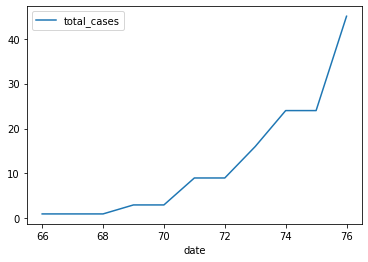

In [93]:
datos.plot(x = 'date', y = 'total_cases')

Como se puede observar, en los primero 11 días el total de casos ascendio a 45. A continuación se predicen el total de casos para los próximos 7 días a partir de la implementación de diversos modelos de regresión.

### Variables de interés

In [94]:
#Obtención de los datos para las variables días y total_casos
fecha_dias = list(datos.iloc[:, 0])
casos_confirmados = list(datos.iloc[:, 1])

#Obtención del día objetivo
proxima_semana = fecha_dias[-1] + 7

rango_dias = np.array(range(60, 85))

### 1) Modelo lineal

Predicción de casos positivos para el día 83:  57


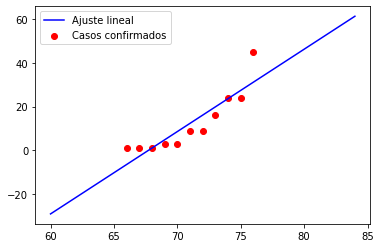

In [95]:
#Creación y entranamiento del modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(np.array(fecha_dias).reshape(-1, 1), casos_confirmados)

#Predecimos el total de casos de la proxima semana
prediccion_semana = modelo_lineal.predict([[proxima_semana]])

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 83: ', int(prediccion_semana))
plt.scatter(fecha_dias, casos_confirmados , color = 'red')
plt.plot(rango_dias, modelo_lineal.predict(rango_dias.reshape(-1, 1)), color = 'blue')
plt.legend(('Ajuste lineal', 'Casos confirmados'))
plt.show()

El modelo lineal predice que a partir de los datos presentados, una semana despues, en el día 83 se confirmarán un total de 57 casos de COVID-19.

### 2) Modelo logistico

Predicción de casos positivos para el día 83:  50


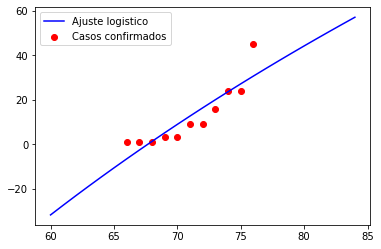

In [96]:
#Definición del modelo logístico
modelo_logistico = lambda x, a, b: a + b * np.log(x)

#Realizamos el ajuste de curva para los datos
ajuste = curve_fit(modelo_logistico, fecha_dias, casos_confirmados)

prediccion_total = [modelo_logistico(i, ajuste[0][0], ajuste[0][1]) for i in rango_dias]

#Realizamos la prediccion de la proxima semana
prediccion_semana = prediccion_total[-3]

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 83: ', int(prediccion_semana))
plt.scatter(fecha_dias, casos_confirmados , color = 'red')
plt.plot(rango_dias, prediccion_total, color = 'blue')
plt.legend(('Ajuste logistico', 'Casos confirmados'))
plt.show()

El modelo logístico predice que a partir de los datos presentados, una semana despues, en el día 83 se confirmarán un total de 50 casos de COVID-19.

### 3) Modelo exponencial

Predicción de casos positivos para el día 83:  123


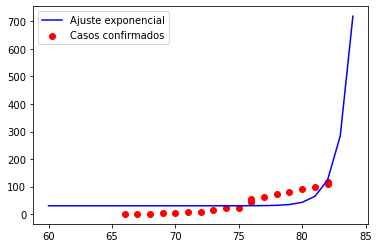

In [101]:
#Definición del modelo exponencial
modelo_exponencial = lambda x, a, b: a + b * np.exp(x)

#Realizamos el ajuste de curva para los datos
ajuste = curve_fit(modelo_exponencial, fecha_dias, casos_confirmados)

prediccion_total = [modelo_exponencial(i, ajuste[0][0], ajuste[0][1]) for i in rango_dias]

#Realizamos la prediccion de la proxima semana
prediccion_semana = prediccion_total[-3]

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 83: ', int(prediccion_semana))
plt.scatter(fecha_dias, casos_confirmados , color = 'red')
plt.plot(rango_dias, prediccion_total, color = 'blue')
plt.legend(('Ajuste exponencial', 'Casos confirmados'))
plt.show()

El modelo exponencial predice que a partir de los datos presentados, una semana despues, en el día 83 se confirmarán un total de 123 casos de COVID-19.

### 4) Modelo polinómico 

Predicción de casos positivos para el día 83:  131


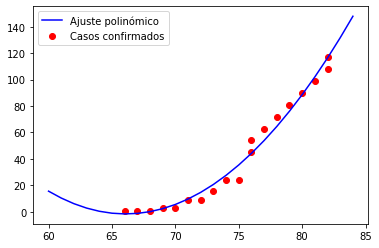

In [102]:
#Definición del modelo polinomial
modelo_polinomial = np.polyfit(fecha_dias, casos_confirmados, 2, full = True)
modelo_polinomial = np.poly1d(modelo_polinomial[0])

prediccion_semana = modelo_polinomial(proxima_semana)

rango_dias = np.array(range(60, 85))

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 83: ', int(prediccion_semana))
plt.scatter(fecha_dias, casos_confirmados, color = 'red')
plt.plot(rango_dias, modelo_polinomial(rango_dias), color = 'blue')
plt.legend(('Ajuste polinómico', 'Casos confirmados'))
plt.show()

El modelo polinómico predice que a partir de los datos presentados, una semana despues, en el día 83 se confirmarán un total de 135 casos de COVID-19.

### 5) Modelo probabilístico

Predicción de casos positivos para el día 83:  126


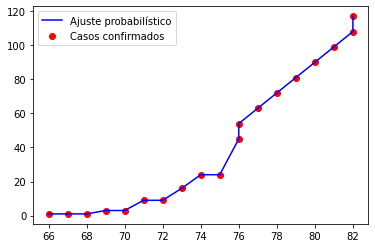

In [99]:
#Obtención de la mediana de los datos
mediana = datos['total_cases'].median()

#Creación del modelo
modelo_probabilistico = lambda y: int(y[-1] + mediana)

prediccion = casos_confirmados

#Predicción mediante la técnica de la mediana
for i in range(fecha_dias[-1], proxima_semana):
    fecha_dias.append(i)
    prediccion.append(modelo_probabilistico(prediccion))
    
prediccion_semana = modelo_probabilistico(casos_confirmados)

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 83: ', int(prediccion_semana))
plt.scatter(fecha_dias, casos_confirmados, color = 'red')
plt.plot(fecha_dias, prediccion, color = 'blue')
plt.legend(('Ajuste probabilístico', 'Casos confirmados'))
plt.show()

El modelo probabilístico predice que a partir de los datos presentados, una semana despues, en el día 83 se confirmarán un total de 126 casos de COVID-19.

### Comparación de modelos matemáticos vs modelos probabilísticos

1. Modelo lineal: predijo que habría 57 casos. Es desventajoso porque los datos tienen una tendencia curva, y por lo tanto, es una de las dos predicciones menos acertadas para este conjunto. La ventaja de este modelo es que su implementación es muy sencilla y rapida. 

2. Modelo logísitico: predijo un total de 50 casos. La curva generada por este modelo no se apega a los datos y su predicción es la peor en este caso. Por otra parte, es ventajoso usar este modelo cuando los datos tienden a crecer de forma que tiende a estabilizarse con valores más grandes.

3. Modelo exponencial: predijo un total de 123 casos. La ventaja es que predice regularmente bien cuando el dia estimando se encuentra cerca de los datos anteriores. La desventaja es que cuando se aleja demasiado del conjunto de entrenamiento, el pico de predicción se empieza a elevar demasiado.

4. Modelo polinómico: predijo un total de 131 casos. En este caso con un modelo de segundo grado, la curva se ajusta bien al conjunto y largo plazo será el que mejor prediga entre el resto de modelos. La desventaja es que dependiendo del grado, la tendencia de predicción podría no apegarse bien a los proximos datos.

5. Modelo probabilístico: predijo un total de 126 casos. La ventaja de usarlo es que se ajusta perfectamente a los datos de entrenamiento. La desventaja y el principal problema de este modelo es que una vez se utilizan datos de prueba, la tendecia de predicción empieza a ser lineal.

### Conclusiones

De acuerdo al conjunto de datos utilizado y a los modelos implementados en esta prueba, se determina que el mejor modelo de predicción es el polinómico, pues se apega muy bien a los datos. Cabe destacar que para este caso se uso un modelo polinómico de segundo grado por su tendencia parabólica, por lo que de cambiar esta tendecia sería mejor reajustar el grado del modelo. 